In [1]:
import os
import sys
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), ".."))) # 현재 파일의 상위 디렉토리를 sys.path에 추가

os.chdir(r'C:\Programming\Github\Project\ChemGCNs') # my / pcrl

c:\Programming\anaconda3\envs\chem\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['C=O', 'CNN', 'C(=O)O', 'CCl', 'CN']
0    8.27
1    3.91
2    3.75
3    8.37
4    7.88
Name: logvp, dtype: float64


[21:27:07] SMILES Parse Error: syntax error while parsing: FH
[21:27:07] SMILES Parse Error: Failed parsing SMILES 'FH' for input: 'FH'
[21:27:07] Explicit valence for atom # 1 Br, 5, is greater than permitted


초기 변수 개수: 208
결측치가 포함된 열 개수: 208 

MaxEStateIndex        True
MinEStateIndex        True
MaxAbsEStateIndex     True
MinAbsEStateIndex     True
qed                   True
                     ...  
fr_thiocyan           True
fr_thiophene          True
fr_unbrch_alkane      True
fr_urea               True
target               False
Length: 209, dtype: bool
결측치가 포함된 행 개수: 3 

0     False
1     False
2     False
3     False
4     False
      ...  
77    False
78    False
79    False
80    False
81    False
Length: 82, dtype: bool
제거 후 남은 feature 개수: 208
결측치가 포함된 열 개수: 0 

MaxEStateIndex       False
MinEStateIndex       False
MaxAbsEStateIndex    False
MinAbsEStateIndex    False
qed                  False
                     ...  
fr_thiocyan          False
fr_thiophene         False
fr_unbrch_alkane     False
fr_urea              False
target               False
Length: 209, dtype: bool
결측치가 포함된 행 개수: 0 

0     False
1     False
2     False
3     False
4     False
      ...  
77    False


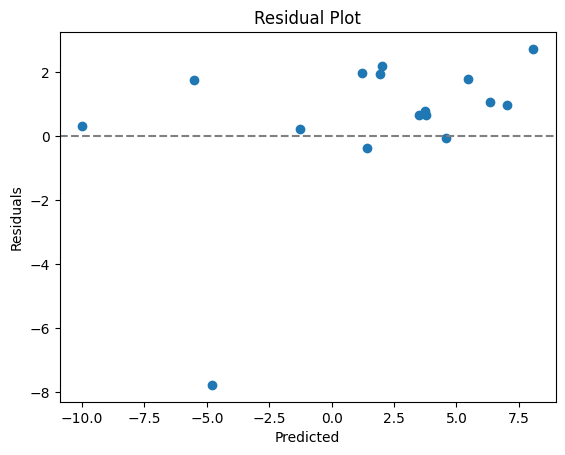

mol_conv.py upper
# 1
mol_graph.NumHDonors = dsc.NumHDonors(mol)
mol_graph.LabuteASA = dsc.LabuteASA(mol)
mol_graph.Chi1 = dsc.Chi1(mol)


mol_conv.py under
# 1
normalize_self_feat(mol_graphs, 'NumHDonors')
normalize_self_feat(mol_graphs, 'LabuteASA')
normalize_self_feat(mol_graphs, 'Chi1')


exec_reg.py
# 1
self_feats[i, 0] = mol_graph.NumHDonors
self_feats[i, 1] = mol_graph.LabuteASA
self_feats[i, 2] = mol_graph.Chi1


In [2]:
import variable_selection

X_train_None0 = variable_selection.X_train_None0
df_screening = variable_selection.df_screening

In [3]:
# # heatmap
# # 상관관계 행렬

# col_order = X_train_None0.columns
# df_corr = df_screening.drop(columns=['target'])[col_order]
# df_corr = df_corr.corr()

# save_dir = r'.\results_figure\heatmap'
# dataset = variable_selection.DATASET.replace('datasets\\', '')

# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize = (16,12))
# ax = sns.heatmap(df_corr, annot = False, center = 0, cmap = 'RdBu', vmin=-1, vmax=1, cbar_kws={'shrink': 0.2, 'aspect': 20}, xticklabels=True)

# # Color bar 타이틀 설정
# colorbar = ax.collections[0].colorbar
# colorbar.ax.set_title("corr", fontsize=12, pad = 10)
# plt.xticks(rotation=90, fontsize=10)

# # 저장
# file_name = f'heatmap_{dataset}.png'
# file_path = os.path.join(save_dir, file_name)
# print(file_path)
# plt.savefig(file_path, dpi = 300, bbox_inches = 'tight')

# plt.show()

.\results_figure\heatmap\heatmap_logvp.pdf


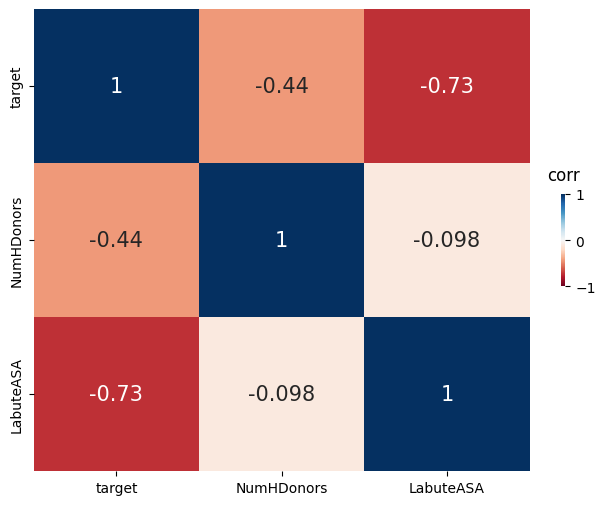

In [4]:
# Vapor Pressure #
col_order = ['target', 'NumHDonors', 'LabuteASA']
df_corr = df_screening[col_order]
df_corr = df_corr.corr()
df_corr

# heatmap
# 상관관계 행렬
save_dir = r'.\results_figure\heatmap'
dataset = variable_selection.DATASET.replace('datasets\\', '')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
ax = sns.heatmap(df_corr, annot = True, annot_kws = {'size':15}, center = 0, cmap = 'RdBu', vmin=-1, vmax=1, cbar_kws={'shrink': 0.2, 'aspect': 20}, xticklabels=True)

# Color bar 타이틀 설정
colorbar = ax.collections[0].colorbar
colorbar.ax.set_title("corr", fontsize=12, pad = 10)
plt.xticks(rotation=00, fontsize=10)

# # png 저장
# file_name = f'heatmap_{dataset}.png'
# file_path = os.path.join(save_dir, file_name)
# print(file_path)
# plt.savefig(file_path, dpi = 300, bbox_inches = 'tight')

# pdf 저장
file_name = f'heatmap_{dataset}.pdf'
file_path = os.path.join(save_dir, file_name)
print(file_path)
plt.savefig(file_path, bbox_inches = 'tight')

plt.show()

In [5]:
# 상관관계 확인
# 상관관계 |r| < 0.1의 개수
num_low_corr = np.count_nonzero(~np.isnan(df_corr[np.abs(df_corr) < 0.1]))
print(num_low_corr)

# 전체 개수
# 행 * 열 - 대각선
num_corr = (df_corr.shape[0] * df_corr.shape[1] - df_corr.shape[0])

# 전체에서 가지는 비율
print(num_low_corr / num_corr)

df_corr['NumAromaticRings'].sort_values()

2
0.3333333333333333


KeyError: 'NumAromaticRings'

# 기초통계량

In [ ]:
# 통계량
re1 = pd.DataFrame(df_screening.iloc[:, -1].describe()).T
re2 = df_screening.iloc[:, variable_selection.final_selected_features_index].describe().T

re3 = pd.concat([re1, re2], axis = 0)
print(re3)

# overleaf 양식에 맞게 통계량 출력
for i in range(len(re3)):
    print(f'{re3.iloc[i].name.replace("_", "")} & {re3.iloc[i]["mean"]:.2f} & {re3.iloc[i]["std"]:.2f} & {re3.iloc[i]["min"]:.2f} & {re3.iloc[i]["25%"]:.2f} & {re3.iloc[i]["50%"]:.2f} & {re3.iloc[i]["75%"]:.2f} & {re3.iloc[i]["max"]:.2f} \\\\')
    

                          count          mean           std        min  \
target                   4199.0  2.186068e+00  1.203022e+00  -1.500000   
MolLogP                  4199.0  3.280598e+00  1.322818e+00  -5.621800   
fr_COO                   4199.0  1.121696e-01  3.223337e-01   0.000000   
Ipc                      4199.0  3.268340e+27  2.117874e+29  46.670483   
fr_sulfonamd             4199.0  1.031198e-01  3.111204e-01   0.000000   
PEOE_VSA7                4199.0  4.005978e+01  1.958038e+01   0.000000   
PEOE_VSA13               4199.0  3.194534e+00  4.384004e+00   0.000000   
SlogP_VSA10              4199.0  7.399353e+00  7.783471e+00   0.000000   
fr_unbrch_alkane         4199.0  1.693260e-01  8.164882e-01   0.000000   
SMR_VSA10                4199.0  2.376228e+01  1.257149e+01   0.000000   
PEOE_VSA12               4199.0  3.608486e+00  5.097193e+00   0.000000   
fr_guanido               4199.0  7.620862e-03  9.483585e-02   0.000000   
FpDensityMorgan1         4199.0  1.107